In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

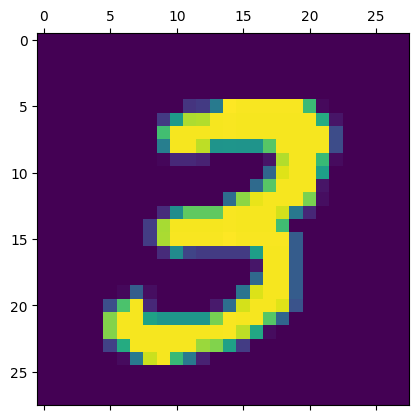

In [ ]:
plt.matshow(X_train[7])

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

X_test_flattened.shape



(10000, 784)

In [ ]:

model =keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4688 - accuracy: 0.8781
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3038 - accuracy: 0.9148
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2831 - accuracy: 0.9203
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2730 - accuracy: 0.9230
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2660 - accuracy: 0.9262
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2619 - accuracy: 0.9273
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2579 - accuracy: 0.9279
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2552 - accuracy: 0.9287
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2530 - accuracy: 0.9298
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.250

In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2672 - accuracy: 0.9256


[0.2671666741371155, 0.925599992275238]

In [ ]:
index_to_check = 55

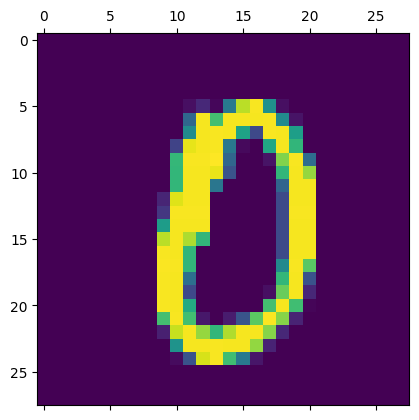

In [ ]:
plt.matshow(X_test[index_to_check])

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted[index_to_check]

313/313 [==============================] - 0s 1ms/step


array([9.9965656e-01, 3.9468837e-08, 8.6363465e-02, 1.4910322e-01,
       1.2349184e-03, 9.4740218e-01, 1.1481919e-02, 1.8566371e-04,
       9.0333009e-01, 4.7753327e-02], dtype=float32)

In [ ]:
np.argmax(y_predicted[index_to_check])

0

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    0,    2,    0,    9,    3,    4,    2,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   7,   10,  910,   23,   10,    4,   11,   15,   40,    2],
       [   2,    0,   12,  936,    1,   22,    2,   11,   19,    5],
       [   1,    1,    4,    3,  917,    0,   10,    4,   11,   31],
       [   7,    2,    1,   44,    7,  779,   14,    6,   29,    3],
       [  12,    3,    8,    1,    8,   14,  909,    1,    2,    0],
       [   1,    6,   18,   12,    6,    1,    0,  958,    2,   24],
       [   6,   10,    5,   31,    9,   31,    6,   13,  859,    4],
       [  11,    7,    1,   14,   22,    6,    0,   26,    7,  915]],
      dtype=int32)>

<Axes: >

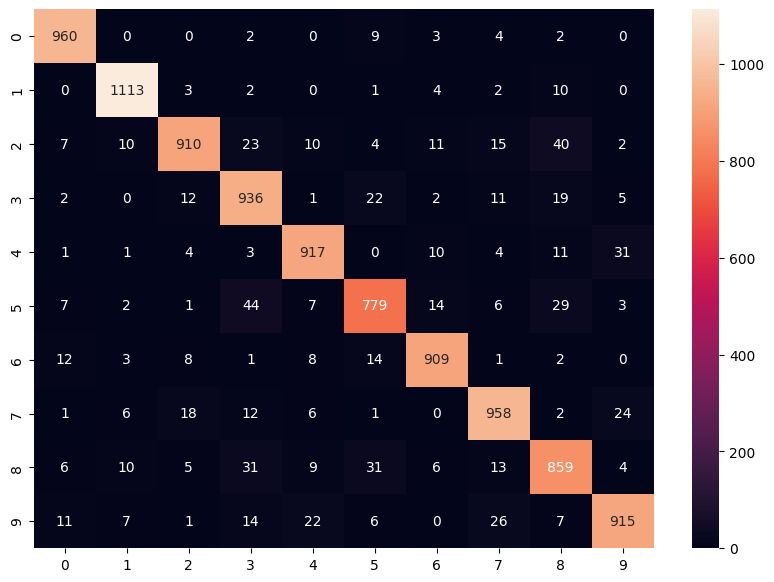

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')


In [ ]:
model =keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10,  activation='sigmoid')

])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2723 - accuracy: 0.9216
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1261 - accuracy: 0.9633
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0890 - accuracy: 0.9732
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0664 - accuracy: 0.9796
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0526 - accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0420 - accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0345 - accuracy: 0.9891
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0289 - accuracy: 0.9909
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0233 - accuracy: 0.9928
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.019

In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0940 - accuracy: 0.9756


[0.09400057047605515, 0.975600004196167]

313/313 [==============================] - 1s 3ms/step


<Axes: >

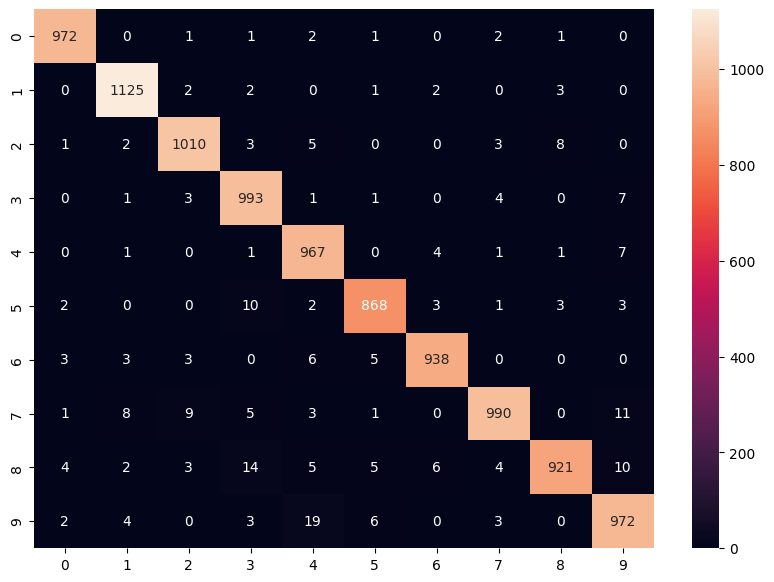

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions = y_predicted_labels)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')

